In [8]:
# Con questa cella qualsiasi file .py dentro creation_functions puà essere importato
import sys

import pandas as pd

sys.path.append("creation_functions")

In [9]:
# Ad esempio, posso importare la funzione "create_time_series"
# SINTASSI : from creation_functions.<nomeFile.py> import <nomeFunzione>
from creation_functions.utilities import preprocessing

#### Descrizione per Marco del file utilities.py e feature_extraction.py
in utilities.py troverai due funzioni:
- _create_time_series_ fa tutto il merge e restituisce il dataset con delle colonne carine "subject" e "trial" per identificare attori e tentativo. Se la chiami senza argomenti restituisce il dataset collassato, se la chiami con mode="raw" restituisce il dataset originale (appunto con quelle colonne in più)
- _get_some_filter_ è una funzione per filtrare il dataset, che sia collassato o meno, sulla base di attori è attività. Prende come argomento il dataset, una lista di attori e una lista di attività, e restituisce i dati di solo quegli attori e solo quelle attività
- _preprocessing(dataframe)_ restituisce il dataset preprocessato pulito e con le feature ridondanti eliminate. Come input gli va dato in sostanza il risultato di _create_time_series_, per cui puoi prendere anche il csv collapsed_dataset.csv e mandare quello come input

In feature_extraction.py troverai tutte le funzioni necessarie alla creazione del dataset collassato

In [5]:
# Giusto un test
import pandas as pd
df = pd.read_csv("collapsed_dataset.csv", index_col=0)

In [6]:
df

,rotationRate.x_mean,rotationRate.x_std,rotationRate.x_range,rotationRate.x_IRQ,rotationRate.x_kurtosis,rotationRate.x_skewness,rotationRate.y_mean,rotationRate.y_std,rotationRate.y_range,rotationRate.y_IRQ,...,userAcceleration.zX#4,userAcceleration.zX#5,userAcceleration.zP#1,userAcceleration.zP#2,userAcceleration.zP#3,userAcceleration.zP#4,userAcceleration.zP#5,class,subject,trial
0,-0.598261,1.035781,4.233415,1.694033,-0.956685,-0.026229,-0.605087,1.396446,7.230130,1.424294,...,0.001733,0.002000,13.700572,10.224221,10.358839,6.709421,4.084380,dws,1,1
0,-0.097542,0.911372,4.092728,1.277495,-0.304429,-0.495648,-0.277137,2.013441,9.061658,2.576537,...,0.002133,0.002533,5.850030,11.432027,6.780674,2.345534,3.073217,dws,1,1
0,-0.487880,0.978326,3.449292,1.656486,-1.154190,-0.245725,-0.365722,1.684748,7.731247,1.979464,...,0.001867,0.002267,4.412037,13.431157,9.487825,6.022618,2.581206,dws,1,1
0,-0.230015,0.801757,3.117364,1.283280,-1.001235,-0.049592,-0.205252,1.701594,8.058310,1.863078,...,0.001333,0.001600,5.226085,5.735624,9.180742,3.292413,3.253893,dws,1,1
0,-0.329812,0.915968,3.936913,1.330359,-0.442254,-0.571874,-0.214969,1.872646,8.499392,1.856482,...,0.001600,0.001867,6.868747,20.724819,3.935775,6.981037,4.640950,dws,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.167426,0.820002,3.218270,1.132992,-0.277282,-0.712709,0.100111,1.767713,6.997537,3.079349,...,0.001467,0.001867,8.432027,23.248258,16.387223,17.326343,14.355209,wlk,24,15
0,0.126343,0.864684,3.296552,1.340263,-0.396475,-0.779987,0.160952,1.712438,6.762558,2.952453,...,0.001467,0.001867,2.744796,28.087900,19.125783,22.283682,15.586845,wlk,24,15
0,0.115019,0.826878,2.920672,1.411312,-0.870169,-0.638618,0.099231,1.625297,5.384678,2.896010,...,0.001467,0.001867,4.545763,23.301324,14.934430,15.267009,13.367485,wlk,24,15
0,0.173352,1.017701,3.742444,1.614026,-0.978921,-0.555987,0.086624,1.684937,5.718094,2.846144,...,0.001467,0.001867,8.853651,22.491873,10.427867,15.859912,12.952285,wlk,24,15


In [10]:
df_filtered = preprocessing(df)

In [11]:
df_filtered

,rotationRate.x_mean,rotationRate.x_std,rotationRate.x_kurtosis,rotationRate.x_skewness,rotationRate.y_mean,rotationRate.y_std,rotationRate.y_kurtosis,rotationRate.y_skewness,rotationRate.z_mean,rotationRate.z_std,...,userAcceleration.zX#4,userAcceleration.zX#5,userAcceleration.zP#1,userAcceleration.zP#2,userAcceleration.zP#3,userAcceleration.zP#4,userAcceleration.zP#5,class,subject,trial
0,-0.598261,1.035781,-0.956685,-0.026229,-0.605087,1.396446,0.098809,-0.346144,0.142156,0.587843,...,0.001733,0.002000,13.700572,10.224221,10.358839,6.709421,4.084380,dws,1,1
0,-0.097542,0.911372,-0.304429,-0.495648,-0.277137,2.013441,-0.544731,-0.104254,0.176279,0.646674,...,0.002133,0.002533,5.850030,11.432027,6.780674,2.345534,3.073217,dws,1,1
0,-0.487880,0.978326,-1.154190,-0.245725,-0.365722,1.684748,-0.162676,-0.500442,0.118062,0.587619,...,0.001867,0.002267,4.412037,13.431157,9.487825,6.022618,2.581206,dws,1,1
0,-0.230015,0.801757,-1.001235,-0.049592,-0.205252,1.701594,-0.026295,-0.107238,0.175721,0.645406,...,0.001333,0.001600,5.226085,5.735624,9.180742,3.292413,3.253893,dws,1,1
0,-0.329812,0.915968,-0.442254,-0.571874,-0.214969,1.872646,-0.066273,-0.179245,0.045353,0.484535,...,0.001600,0.001867,6.868747,20.724819,3.935775,6.981037,4.640950,dws,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.167426,0.820002,-0.277282,-0.712709,0.100111,1.767713,-0.940849,-0.450283,-0.202753,1.714553,...,0.001467,0.001867,8.432027,23.248258,16.387223,17.326343,14.355209,wlk,24,15
0,0.126343,0.864684,-0.396475,-0.779987,0.160952,1.712438,-1.023655,-0.424766,-0.191931,1.700695,...,0.001467,0.001867,2.744796,28.087900,19.125783,22.283682,15.586845,wlk,24,15
0,0.115019,0.826878,-0.870169,-0.638618,0.099231,1.625297,-1.173320,-0.439067,-0.173962,1.677385,...,0.001467,0.001867,4.545763,23.301324,14.934430,15.267009,13.367485,wlk,24,15
0,0.173352,1.017701,-0.978921,-0.555987,0.086624,1.684937,-1.086116,-0.383748,-0.181117,1.838596,...,0.001467,0.001867,8.853651,22.491873,10.427867,15.859912,12.952285,wlk,24,15


#### Possibili linee guida del notebook
- Le funzioni di _feature_extraction.py_ sono un punto d'arrivo. Avrebbe senso riportare qui alcune di quelle funzioni, come quelle della trasformata di fourier, e testare un po' di parametri (come l'N di segmentazione). In feature_extraction.py poi si riporterebbo direttamente i parametri scelti.

1. Possibili ragionamenti sullo scaling dei dati?
2. Parlare dei parametri scelti per la FFT. In particolare dire che la frequenza è quella del dataset, e se trovi un immaginetta carina della FFT (intesa come equazione) mettercela non fa male
2. Mostrare le variazioni nel tempo e in frequenza a seconda dell'attività considerata
3. Far vedere magari che alcune attività hanno pochi picchi significativi e che quindi "in media", si è pensato che 5 picchi potesse essere un buon numero
4. O magari il ragionamento di quanti picchi trovare potrebbe essere anche una cosa di "quanto tempo ci mette", e quindi scegliere un numero di picchi tale che, se dovesse trovarne di più, ci metterebbe troppo tempo
5. Una volta parlato delle feature estratte, far vedere che non tutte sono rilevanti, magari plottando userAcceleration.y_std e userAcceleration.y_range che sappiamo essere correlate al 99%. Un processo di feature selection si rende quindi necessario
6. Da qui in poi cominciare lo studio di quale K selezionare per SelectKBest (dopo aver in qualche modo caricato il dataset preprocessato con le feature ridondanti eliminate)
7. Svolgere lo studio magari in parallelo considerando sia la grandezza delle finestre sia K
8. Far capire che quindi l'obiettivo del notebook è stato quello di decidere in maniera non troppo stupida sia il numero di picchi da trovare, sia N, sia K

In this notebook we're going to discuss the window's size, the features' extraction and the features' selection.

For the window's size, let's consider 3 different windows' sizes, for example looking at walking, and compare the signals. We expect that if we choose a low window size the algorithm won't be able to correctly characterize the signal, and then it won't be able to classify it. On the other hand, if we select a too large window size we loose in terms of responsiveness of the application that we'll take in exam later.

In [15]:
import pandas as pd
from matplotlib import pyplot as plt
import sys
sys.path.append("creation_functions")

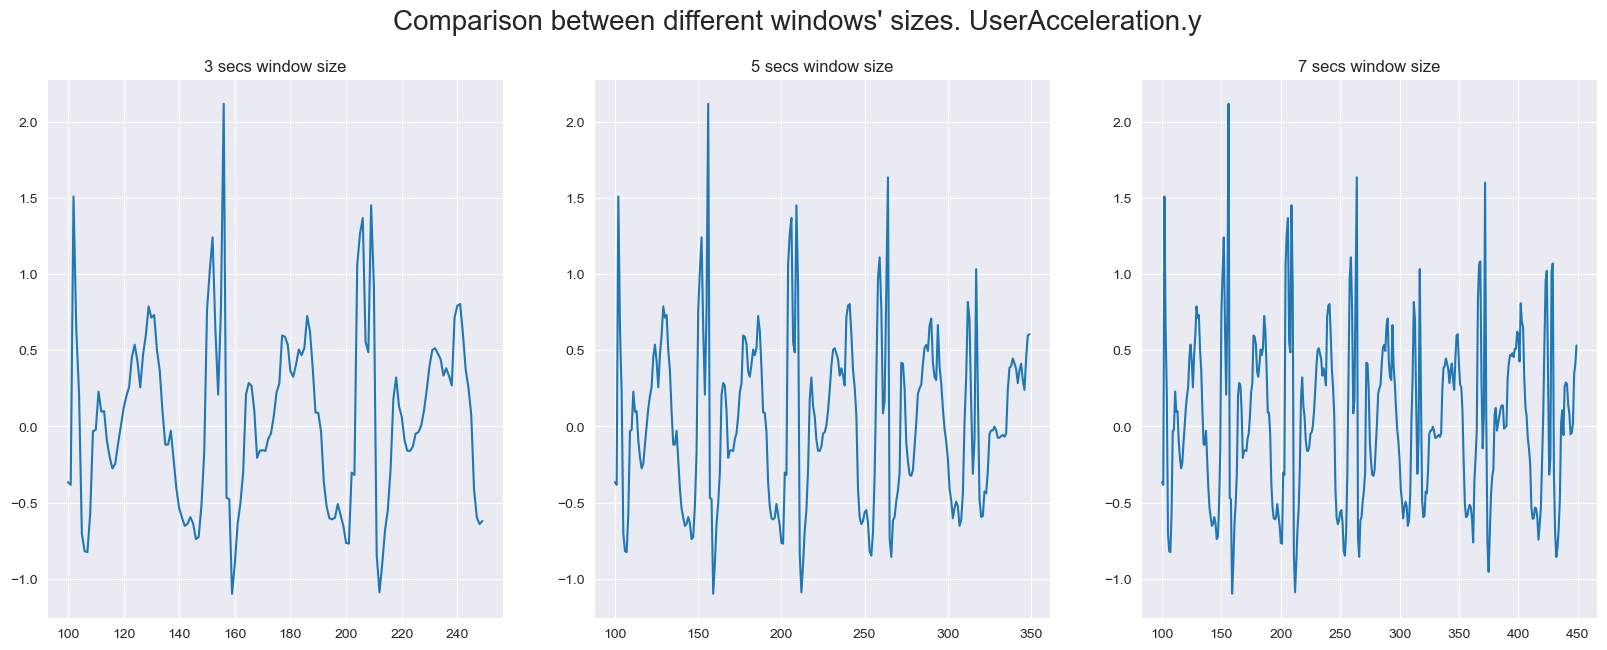

In [16]:
df=pd.read_csv("A_DeviceMotion_data/wlk_7/sub_1.csv")
f,axes=plt.subplots(1,3,figsize=(20,7))
f.suptitle("Comparison between different windows' sizes. UserAcceleration.y", fontsize=20)

axes[0].plot(df["userAcceleration.y"][100:250])
axes[0].title.set_text("3 secs window size")

axes[1].plot(df["userAcceleration.y"][100:350])
axes[1].title.set_text("5 secs window size")

axes[2].plot(df["userAcceleration.y"][100:450])
axes[2].title.set_text("7 secs window size")

At a first look we can see that 3 secs size has more or less 3 steps to deduce the activity that the candidate is doing.
Let's try to see how this translates when trying to classify these windows.

In [17]:
from creation_functions.utilities import create_time_series, preprocessing
df_3secs = preprocessing(create_time_series(labeled=True, mode="Collapsed", num_samples=150))
df_5secs = preprocessing(create_time_series(labeled=True, mode="Collapsed", num_samples=250))
df_7secs = preprocessing(create_time_series(labeled=True, mode="Collapsed", num_samples=350))

C:\Users\marco\Desktop\università\magistrale\data mining and machine learning\gitTest\clone\LavorettiFinali\creation_functions\utilities.py:50: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = only_numeric_dataset.corr().abs()
C:\Users\marco\Desktop\università\magistrale\data mining and machine learning\gitTest\clone\LavorettiFinali\creation_functions\utilities.py:50: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = only_numeric_dataset.corr().abs()
C:\Users\marco\Desktop\università\magistrale\data mining and machine learning\gitTest\clone\LavorettiFinali\creation_functions\utilities.py:50: FutureWarning: The default value o

[Text(0.5, 0, 'Window size'), Text(0, 0.5, 'Accuracy')]

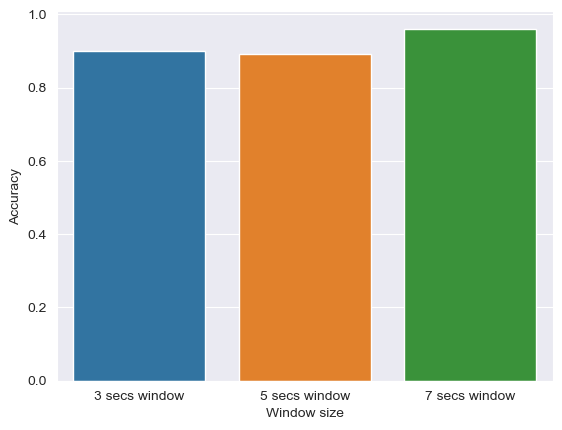

In [26]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import RobustScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import seaborn as sns
import numpy as np

knn_pipe=Pipeline([
    ("scaler", RobustScaler()),
    ("sampling", SMOTE()),
    ("feature-selector", SelectKBest(k=10)),
    ("classifier", KNeighborsClassifier(n_neighbors=5))
])

res_3_secs = np.mean(cross_val_score(knn_pipe, df_3secs.drop("class", axis=1), df_3secs["class"], cv=KFold(5, shuffle=True, random_state=123)))
res_5_secs = np.mean(cross_val_score(knn_pipe, df_5secs.drop("class", axis=1), df_5secs["class"], cv=KFold(5, shuffle=True, random_state=123)))
res_7_secs = np.mean(cross_val_score(knn_pipe, df_7secs.drop("class", axis=1), df_7secs["class"], cv=KFold(5, shuffle=True, random_state=123)))


ax=sns.barplot(x=["3 secs window","5 secs window", "7 secs window"], y=[res_3_secs, res_5_secs, res_7_secs])
ax.set(xlabel="Window size", ylabel="Accuracy")

Now, let's talk about feature extraction. We decided to extract some features, both in time domain and in frequency domain, to describe our signals.
In particular, in time we decided to extract the mean, standard deviation, range, inter-quantile interval, kurtosis and skewness.
Concerning the frequency domain, let's compute the FFT of a signal to see what it's like

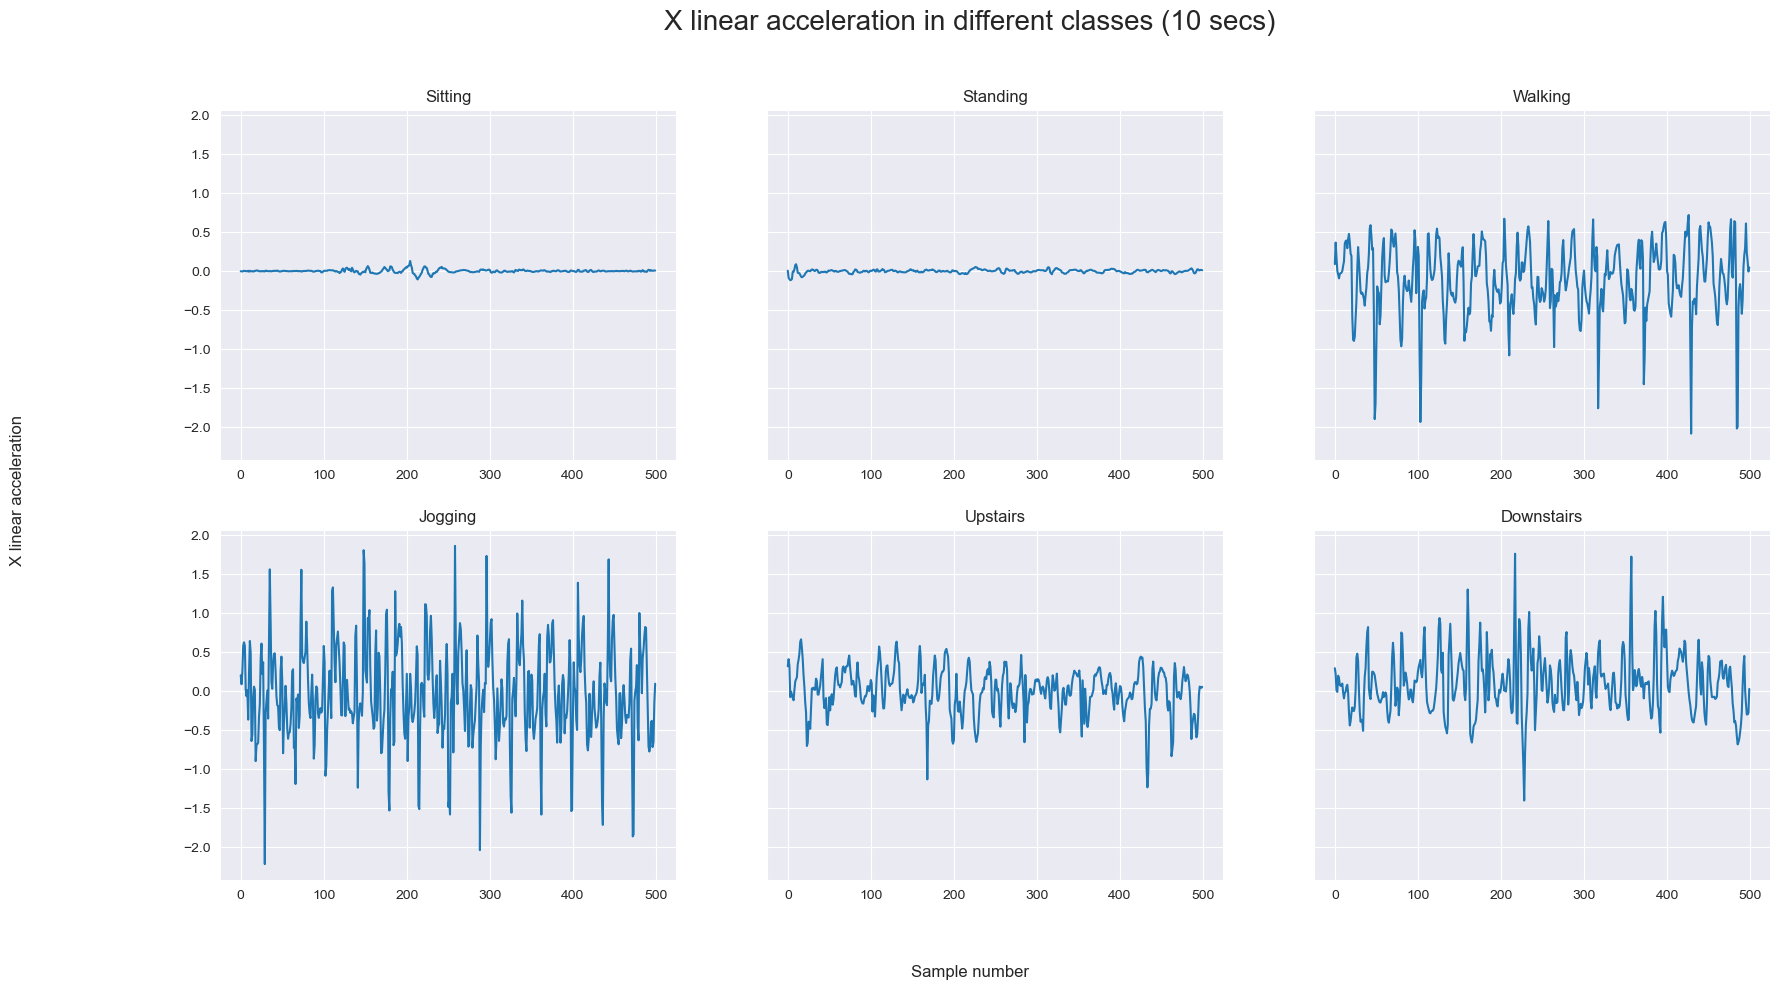

In [27]:
f,axes=plt.subplots(2,3,figsize=(20,10), sharey=True)
sitting_df=pd.read_csv("A_DeviceMotion_data/sit_5/sub_1.csv")["userAcceleration.x"][0:500]
standing_df=pd.read_csv("A_DeviceMotion_data/std_6/sub_1.csv")["userAcceleration.x"][0:500]
walking_df=pd.read_csv("A_DeviceMotion_data/wlk_7/sub_1.csv")["userAcceleration.x"][0:500]
jogging_df=pd.read_csv("A_DeviceMotion_data/jog_9/sub_1.csv")["userAcceleration.x"][0:500]
upstairs_df=pd.read_csv("A_DeviceMotion_data/ups_3/sub_1.csv")["userAcceleration.x"][0:500]
downstairs_df=pd.read_csv("A_DeviceMotion_data/dws_1/sub_1.csv")["userAcceleration.x"][0:500]

f.suptitle("X linear acceleration in different classes (10 secs)", fontsize=20)
f.supxlabel("Sample number")
f.supylabel("X linear acceleration")
axes[0][0].plot(sitting_df)
axes[0][0].title.set_text("Sitting")
axes[0][1].plot(standing_df)
axes[0][1].title.set_text("Standing")
axes[0][2].plot(walking_df)
axes[0][2].title.set_text("Walking")
axes[1][0].plot(jogging_df)
axes[1][0].title.set_text("Jogging")
axes[1][1].plot(upstairs_df)
axes[1][1].title.set_text("Upstairs")
axes[1][2].plot(downstairs_df)
axes[1][2].title.set_text("Downstairs")

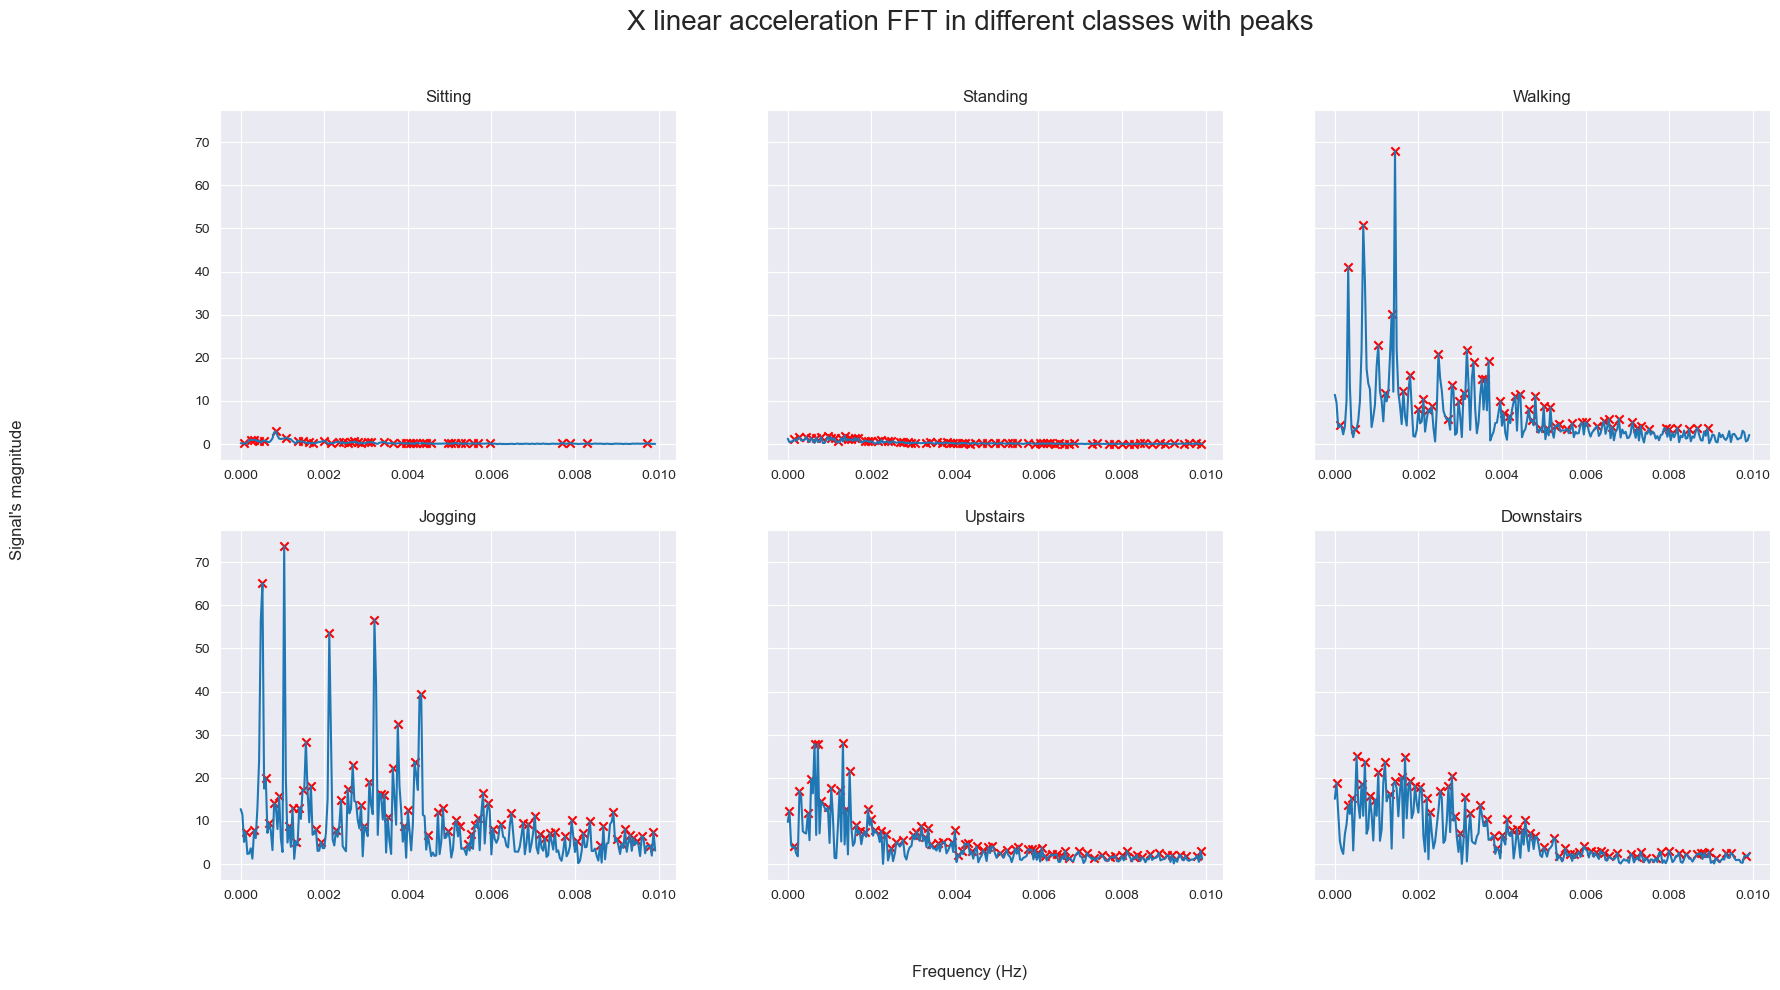

In [28]:
import detecta
from numpy.fft import fft
import numpy as np
N=500
n=np.arange(-1,N)
sr=1/50
T=N/sr
freq=n/T
c=20

# FFT computing
n_oneside=N//2
x=freq[1:n_oneside]
y_sit=np.abs(fft(sitting_df)[1:n_oneside])
y_std=np.abs(fft(standing_df)[1:n_oneside])
y_wlk=np.abs(fft(walking_df)[1:n_oneside])
y_jog=np.abs(fft(jogging_df)[1:n_oneside])
y_ups=np.abs(fft(upstairs_df)[1:n_oneside])
y_dwn=np.abs(fft(downstairs_df)[1:n_oneside])

# PEAKS computing
p_x_sit=detecta.detect_peaks(y_sit, mph=np.amax(y_sit)/c)
p_x_std=detecta.detect_peaks(y_std, mph=np.amax(y_std)/c)
p_x_wlk=detecta.detect_peaks(y_wlk, mph=np.amax(y_wlk)/c)
p_x_jog=detecta.detect_peaks(y_jog, mph=np.amax(y_jog)/c)
p_x_ups=detecta.detect_peaks(y_ups, mph=np.amax(y_ups)/c)
p_x_dwn=detecta.detect_peaks(y_dwn, mph=np.amax(y_dwn)/c)

#PLOT
f,axes=plt.subplots(2,3,figsize=(20,10), sharey=True)
f.suptitle("X linear acceleration FFT in different classes with peaks", fontsize=20)
f.supxlabel("Frequency (Hz)")
f.supylabel("Signal's magnitude")
axes[0][0].plot(x,y_sit)
axes[0][0].scatter(p_x_sit/T, y_sit[p_x_sit], marker="x", c="red")
axes[0][0].title.set_text("Sitting")
axes[0][1].plot(x,y_std)
axes[0][1].scatter(p_x_std/T, y_std[p_x_std], marker="x", c="red")
axes[0][1].title.set_text("Standing")
axes[0][2].plot(x,y_wlk)
axes[0][2].scatter(p_x_wlk/T, y_wlk[p_x_wlk], marker="x", c="red")
axes[0][2].title.set_text("Walking")
axes[1][0].plot(x,y_jog)
axes[1][0].scatter(p_x_jog/T, y_jog[p_x_jog], marker="x", c="red")
axes[1][0].title.set_text("Jogging")
axes[1][1].plot(x,y_ups)
axes[1][1].scatter(p_x_ups/T, y_ups[p_x_ups], marker="x", c="red")
axes[1][1].title.set_text("Upstairs")
axes[1][2].plot(x,y_dwn)
axes[1][2].scatter(p_x_dwn/T, y_dwn[p_x_dwn], marker="x", c="red")
axes[1][2].title.set_text("Downstairs")